# Session 4 - Blurring and Thresholds

In [49]:
import os
import sys
sys.path.append(os.path.join(".."))

# image processing and numerical tools
import cv2
import numpy as np

# plotting utils
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
import matplotlib.pyplot as plt

In [6]:
filename = os.path.join("..", "..","cds-vis-data","data", "img", "trex.png")

In [7]:
image = cv2.imread(filename)

## Blurring with convolutional kernels

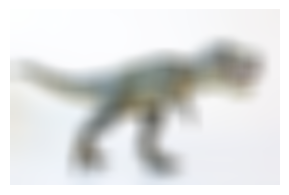

In [21]:
show(cv2.blur(image,(30,30)))

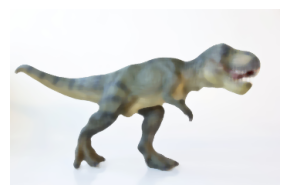

In [36]:
show(cv2.medianBlur(image,7))

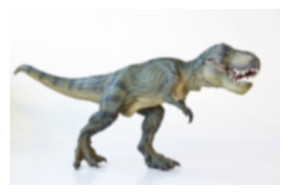

In [45]:
show(cv2.GaussianBlur(image,(7,7),0))

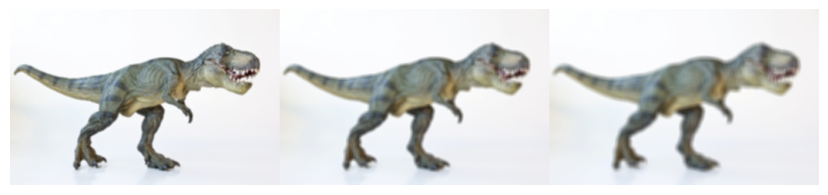

In [53]:
blurred_stack = np.hstack([
    cv2.blur(image, (3, 3)),
    cv2.blur(image, (5, 5)),
    cv2.blur(image, (7, 7))
    ])
show(blurred_stack)

## Thresholding

In [54]:
image = cv2.imread(filename)

In [55]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

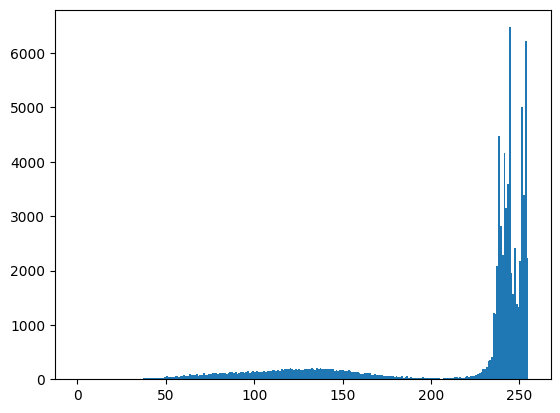

In [61]:
plt.hist(gray.flatten(),255)
plt.show()

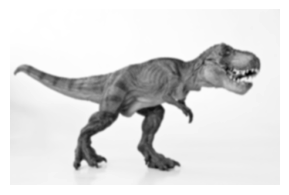

In [66]:
blurred = cv2.GaussianBlur(gray,(5,5),0)
show_channel(blurred)

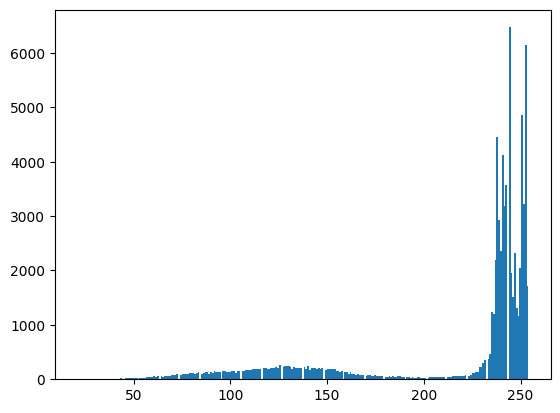

In [72]:
plt.hist(blurred.flatten(),255)
plt.show()

In [86]:
_, binary_image = cv2.threshold(blurred,200,255,cv2.THRESH_BINARY)

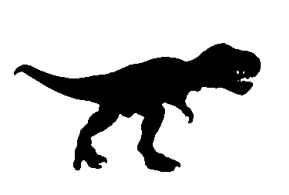

In [87]:
show_channel(binary_image)

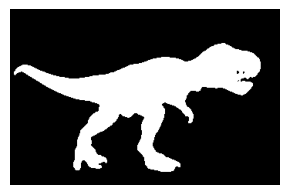

In [89]:
show_channel(cv2.bitwise_not(binary_image))

In [90]:
_, binary_image_inv = cv2.threshold(blurred,200,255,cv2.THRESH_BINARY_INV)

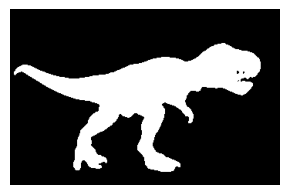

In [91]:
show_channel(binary_image_inv)

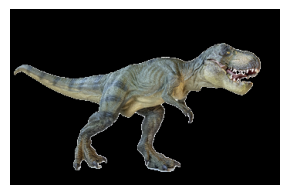

In [99]:
show(cv2.bitwise_and(image,image,mask = binary_image_inv))

## Sobel

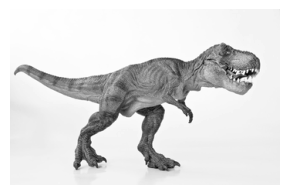

In [101]:
show_channel(gray)

In [102]:
sobel_horizontal = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobel_vertical = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

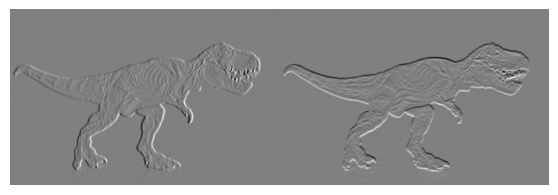

In [104]:
edges = np.hstack([
    sobel_horizontal,
    sobel_vertical
])

show_channel(edges)

In [106]:
sobelX = np.uint8(np.absolute(sobel_horizontal))
sobelY = np.uint8(np.absolute(sobel_vertical))

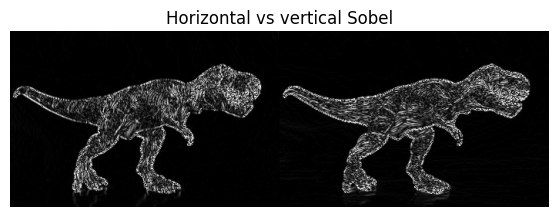

In [109]:
edges = np.hstack([sobelX, sobelY])
show_channel(edges, "Horizontal vs vertical Sobel")